KD Method  ACC Mean  ECE Mean  Normalized Harmonic Score
       AT 37.513750  0.164041                   0.450384
      CRD 41.380938  0.175853                   0.460309
      RKD 37.441875  0.163756                   0.454355
      VKD 37.601875  0.163522                   0.471248


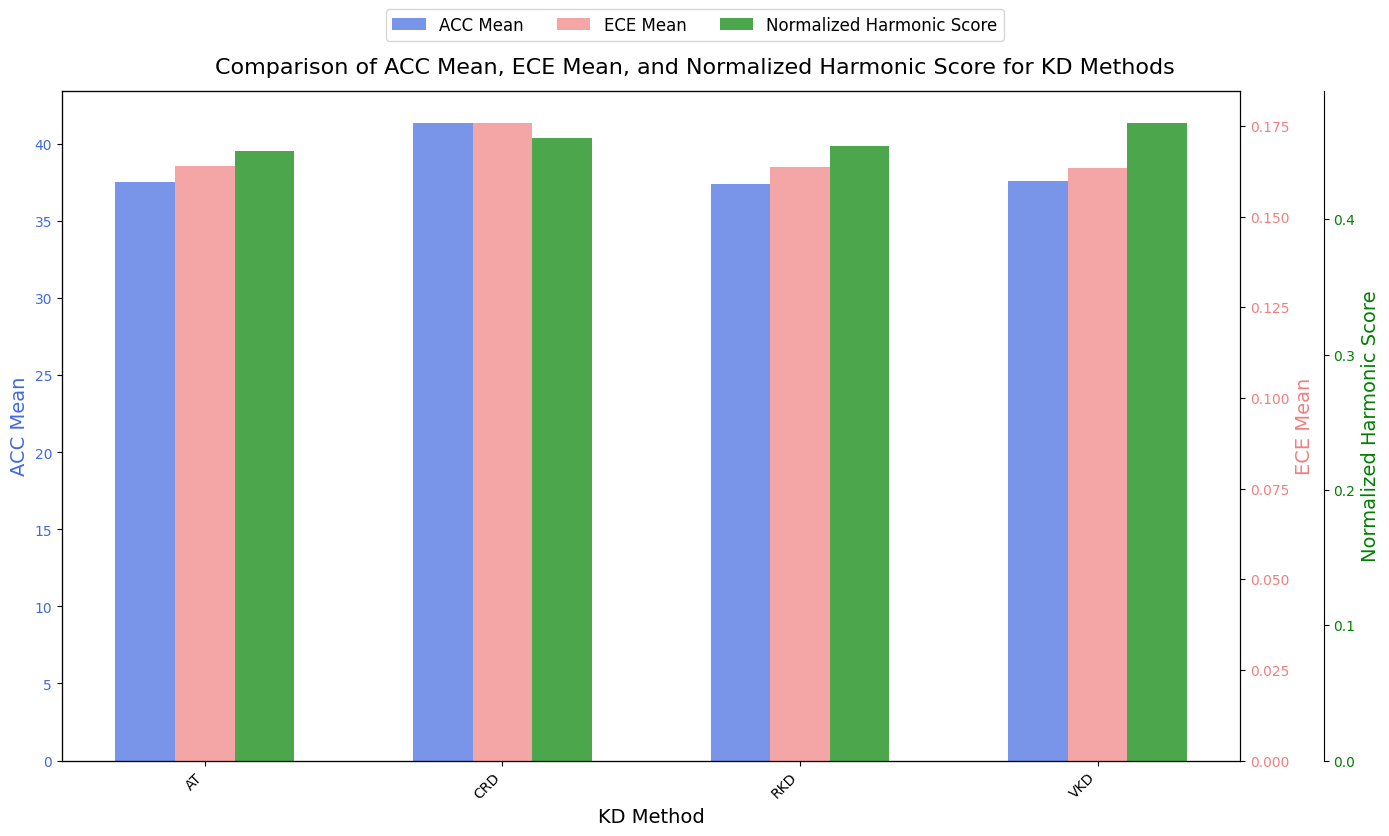

In [1]:
# 데이터 불러오기 및 초기 설정
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 파일 읽기
df = pd.read_csv("//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/results/experiment_results.txt", sep=", ", engine="python")

# 데이터 타입 변환
df["ACC Mean"] = df["ACC Mean"].astype(float)
df["ECE Mean"] = df["ECE Mean"].astype(float)

# KD 기법 목록
kd_methods = ['VKD', 'CRD', 'RKD', 'AT']

# 데이터 정규화
df["Normalized ACC"] = (df["ACC Mean"] - df["ACC Mean"].min()) / (df["ACC Mean"].max() - df["ACC Mean"].min())
df["Normalized ECE"] = (df["ECE Mean"] - df["ECE Mean"].min()) / (df["ECE Mean"].max() - df["ECE Mean"].min())

# 정규화된 조화평균 계산
df["Normalized Harmonic Score"] = 2 * (
    df["Normalized ACC"] * (1 - df["Normalized ECE"])
) / (df["Normalized ACC"] + (1 - df["Normalized ECE"]))

# KD 기법별 평균 계산
kd_avg = (
    df[df['KD Method'].isin(kd_methods)]
    .groupby("KD Method")[["ACC Mean", "ECE Mean", "Normalized Harmonic Score"]]
    .mean()
    .reset_index()
)

# KD 기법별 평균 출력
print(kd_avg.to_string(index=False))

# X축 위치 설정
x = np.arange(len(kd_avg["KD Method"]))
width = 0.2  # 막대의 너비

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(14, 8))

# 첫 번째 Y축 (ACC Mean)
bar1 = ax1.bar(
    x - width, 
    kd_avg["ACC Mean"], 
    width, 
    color='royalblue', 
    alpha=0.7, 
    label='ACC Mean'
)
ax1.set_xlabel('KD Method', fontsize=14)
ax1.set_ylabel('ACC Mean', fontsize=14, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xticks(x)
ax1.set_xticklabels(kd_avg["KD Method"], rotation=45, ha='right')

# 두 번째 Y축 (ECE Mean)
ax2 = ax1.twinx()
bar2 = ax2.bar(
    x, 
    kd_avg["ECE Mean"], 
    width, 
    color='lightcoral', 
    alpha=0.7, 
    label='ECE Mean'
)
ax2.set_ylabel('ECE Mean', fontsize=14, color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')

# 세 번째 Y축 (Normalized Harmonic Score)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # 세 번째 Y축 위치 조정
bar3 = ax3.bar(
    x + width, 
    kd_avg["Normalized Harmonic Score"], 
    width, 
    color='green', 
    alpha=0.7, 
    label='Normalized Harmonic Score'
)
ax3.set_ylabel('Normalized Harmonic Score', fontsize=14, color='green')
ax3.tick_params(axis='y', labelcolor='green')

# 범례 추가
bars = [bar1, bar2, bar3]
labels = [bar.get_label() for bar in bars]
fig.legend(bars, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=12)

# 그래프 제목 및 레이아웃
fig.suptitle('Comparison of ACC Mean, ECE Mean, and Normalized Harmonic Score for KD Methods', fontsize=16)
fig.tight_layout()
plt.show()

In [2]:
# 조합별 그룹화 및 평균 계산
group_avg = df.groupby(['KD Method', 'Teacher Calibration', 'Student Calibration']).agg({
    'ACC Mean': 'mean',
    'ECE Mean': 'mean',
    'Normalized Harmonic Score': 'mean'
}).reset_index()

# 성능이 높은 상위 5개 조합
top_combinations = group_avg.nlargest(5, 'Normalized Harmonic Score')
print(top_combinations)

# 성능이 낮은 하위 5개 조합
bottom_combinations = group_avg.nsmallest(5, 'Normalized Harmonic Score')
print(bottom_combinations)


    KD Method Teacher Calibration Student Calibration  ACC Mean  ECE Mean  \
109       VKD              TBS_MX                  BS     38.81    0.1349   
37        CRD             TALS_MX                  BS     41.64    0.1512   
52        CRD              TCP_MX                 ALS     40.34    0.1465   
36        CRD             TALS_MX                 ALS     41.42    0.1515   
45        CRD              TBS_MX                  BS     41.98    0.1541   

     Normalized Harmonic Score  
109                   0.755596  
37                    0.755382  
52                    0.751265  
36                    0.746633  
45                    0.738620  
   KD Method Teacher Calibration Student Calibration  ACC Mean  ECE Mean  \
27        AT               TNone                  CP     38.69    0.2037   
68       RKD             TALS_MX                 ALS     30.71    0.1412   
43       CRD                 TBS                  CP     40.98    0.2034   
83       RKD                 TCP   

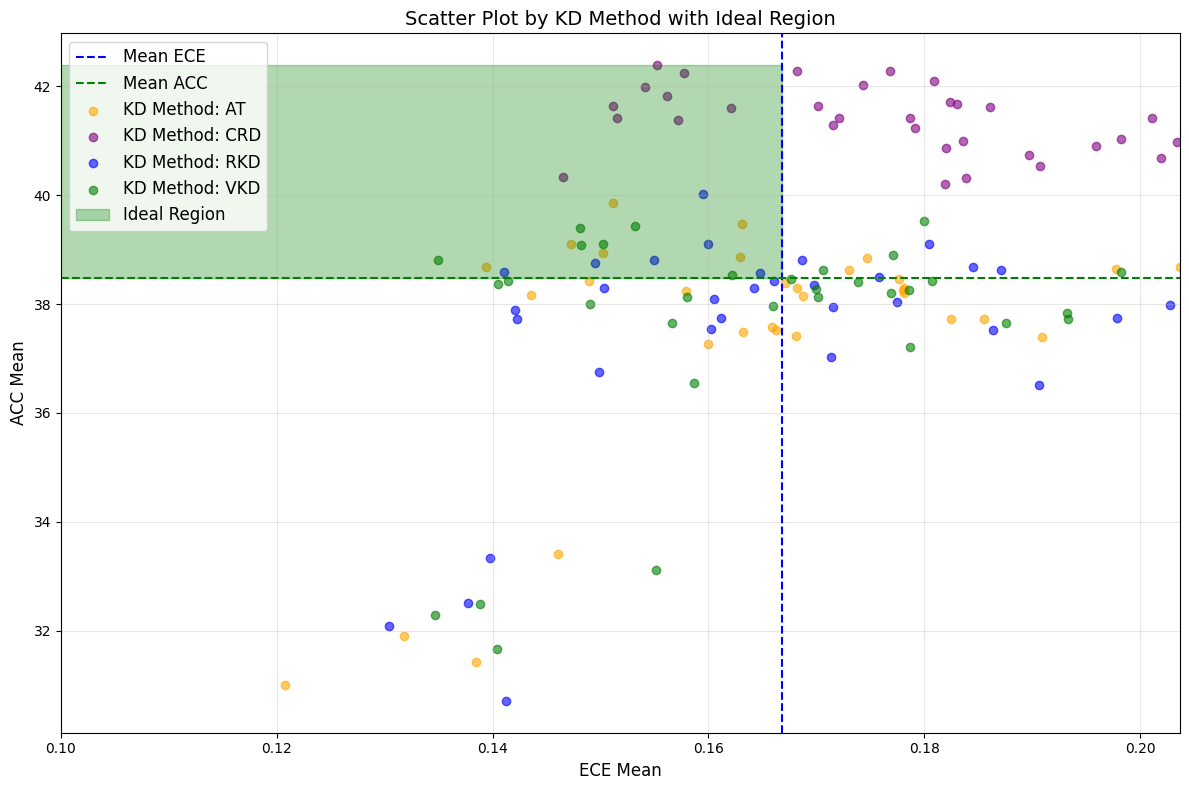

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# KD 기법 분리
kd_methods = ["AT", "CRD", "RKD", "VKD"]
colors = ["orange", "purple", "blue", "green"]

# KD 기법별로 데이터 표시
for kd_method, color in zip(kd_methods, colors):
    kd_data = df[df["KD Method"] == kd_method]
    plt.scatter(
        kd_data["ECE Mean"], 
        kd_data["ACC Mean"], 
        color=color, 
        alpha=0.6, 
        label=f"KD Method: {kd_method}"
    )

# 평균선
ece_mean = df["ECE Mean"].mean()
acc_mean = df["ACC Mean"].mean()
plt.axvline(ece_mean, color="blue", linestyle="--", linewidth=1.5, label="Mean ECE")
plt.axhline(acc_mean, color="green", linestyle="--", linewidth=1.5, label="Mean ACC")

# Ideal Region 표시 (ECE <= Mean ECE AND ACC >= Mean ACC)
plt.fill_betweenx(
    y=[acc_mean, df["ACC Mean"].max()],  # ACC 범위
    x1=0, x2=ece_mean,                  # ECE 범위
    color='green', alpha=0.3, label="Ideal Region"
)

# 그래프 설정
plt.title("Scatter Plot by KD Method with Ideal Region", fontsize=14)
plt.xlabel("ECE Mean", fontsize=12)
plt.ylabel("ACC Mean", fontsize=12)
plt.xlim(0.10, df["ECE Mean"].max())  # X축 범위 조정
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 그래프 표시
plt.show()


Top 5 Teacher Calibration and KD Method Combinations:
   Teacher Calibration KD Method  ACC Mean  ECE Mean  \
21              TCP_MX       CRD   41.3150  0.160575   
5              TALS_MX       CRD   41.8600  0.162950   
13              TBS_MX       CRD   42.1350  0.165725   
29            TNone_MX       CRD   41.7625  0.166550   
15              TBS_MX       VKD   37.0525  0.144100   

    Normalized Harmonic Score  
21                   0.641323  
5                    0.632275  
13                   0.614343  
29                   0.602246  
15                   0.572250  

Bottom 5 Teacher Calibration and KD Method Combinations:
   Teacher Calibration KD Method  ACC Mean  ECE Mean  \
1                 TALS       CRD   41.2025  0.188800   
9                  TBS       CRD   40.7800  0.187375   
25               TNone       CRD   40.8675  0.187150   
17                 TCP       CRD   41.1250  0.187700   
24               TNone        AT   38.0800  0.179900   

    Normalized Harmoni

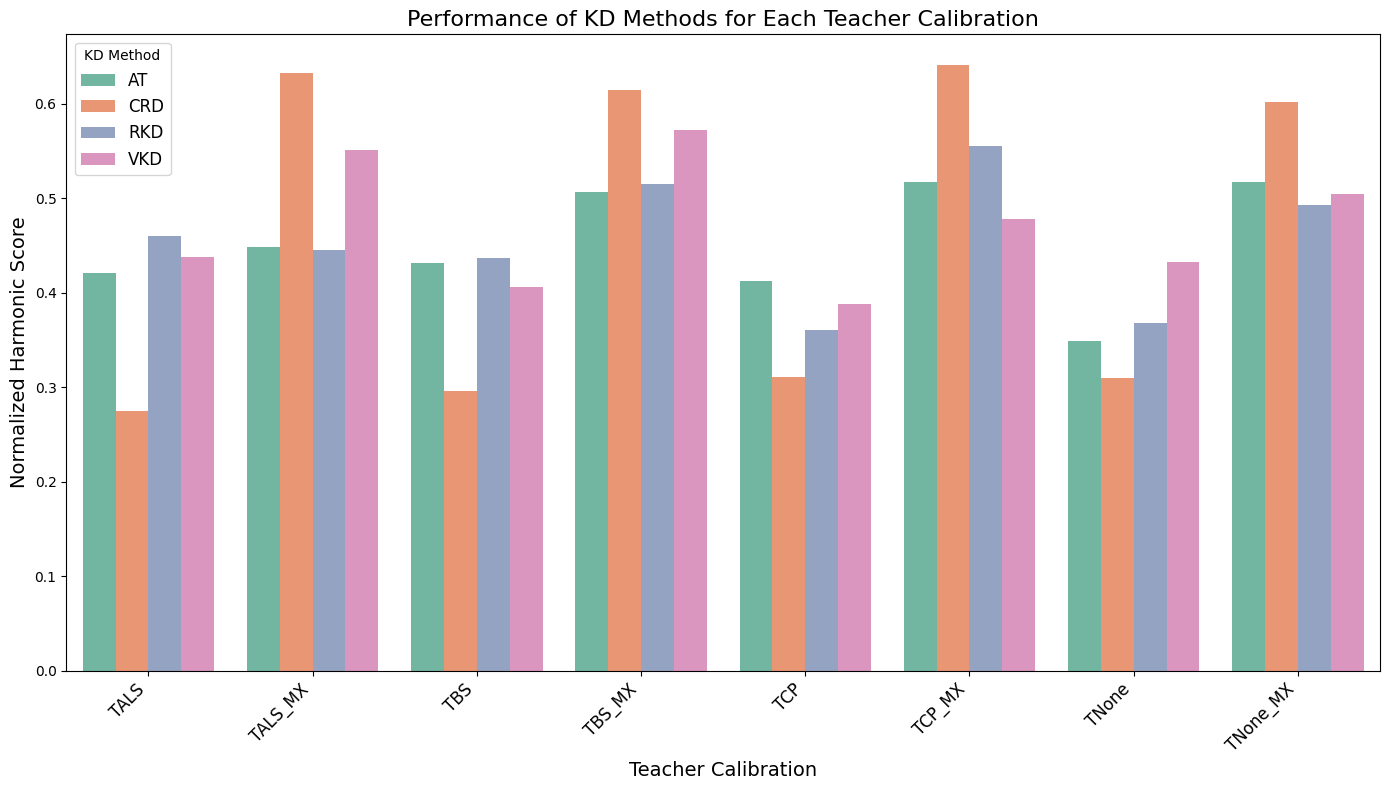

In [4]:
# Teacher Calibration과 KD 기법 조합별 그룹화 및 평균 계산
teacher_kd_group_avg = df.groupby(["Teacher Calibration", "KD Method"]).agg({
    'ACC Mean': 'mean',
    'ECE Mean': 'mean',
    'Normalized Harmonic Score': 'mean'
}).reset_index()

# 성능이 높은 상위 5개 조합
top_teacher_kd_combinations = teacher_kd_group_avg.nlargest(5, 'Normalized Harmonic Score')
print("Top 5 Teacher Calibration and KD Method Combinations:")
print(top_teacher_kd_combinations)

# 성능이 낮은 하위 5개 조합
bottom_teacher_kd_combinations = teacher_kd_group_avg.nsmallest(5, 'Normalized Harmonic Score')
print("\nBottom 5 Teacher Calibration and KD Method Combinations:")
print(bottom_teacher_kd_combinations)

# Teacher Calibration별 KD 기법 성능 비교 시각화
plt.figure(figsize=(14, 8))
sns.barplot(
    data=teacher_kd_group_avg, 
    x="Teacher Calibration", 
    y="Normalized Harmonic Score", 
    hue="KD Method", 
    palette="Set2"
)
plt.title("Performance of KD Methods for Each Teacher Calibration", fontsize=16)
plt.ylabel("Normalized Harmonic Score", fontsize=14)
plt.xlabel("Teacher Calibration", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title="KD Method", fontsize=12)
plt.tight_layout()
plt.show()


In [5]:
# KD Method와 Student Calibration 조합별 그룹화 및 평균 계산
kd_student_group_avg = df.groupby(["KD Method", "Student Calibration"]).agg({
    'ACC Mean': 'mean',
    'ECE Mean': 'mean',
    'Normalized Harmonic Score': 'mean'
}).reset_index()

# 성능이 높은 상위 5개 조합
top_kd_student_combinations = kd_student_group_avg.nlargest(5, 'Normalized Harmonic Score')
print("Top 5 KD Method and Student Calibration Combinations:")
print(top_kd_student_combinations.to_string(index=False))

# 성능이 낮은 하위 5개 조합
bottom_kd_student_combinations = kd_student_group_avg.nsmallest(5, 'Normalized Harmonic Score')
print("\nBottom 5 KD Method and Student Calibration Combinations:")
print(bottom_kd_student_combinations.to_string(index=False))


Top 5 KD Method and Student Calibration Combinations:
KD Method Student Calibration  ACC Mean  ECE Mean  Normalized Harmonic Score
      VKD                  BS   38.4850  0.157825                   0.591365
      RKD                  CE   38.3225  0.157850                   0.576047
       AT                  BS   38.3400  0.160250                   0.574360
       AT                  CE   38.4500  0.161900                   0.558879
      VKD                  CE   38.2750  0.161325                   0.553303

Bottom 5 KD Method and Student Calibration Combinations:
KD Method Student Calibration  ACC Mean  ECE Mean  Normalized Harmonic Score
      CRD                  CP  41.46625  0.189075                   0.270783
       AT                  CP  38.37500  0.183325                   0.329098
      RKD                  CP  38.05750  0.182837                   0.333017
       AT                 ALS  34.89000  0.150688                   0.339197
      VKD                  CP  38.42500  

In [7]:
kd_teacher_student_avg = df.groupby(["KD Method", "Teacher Calibration", "Student Calibration"]).agg({
    'ACC Mean': 'mean',
    'ECE Mean': 'mean',
    'Normalized Harmonic Score': 'mean'
}).reset_index()

# 상위 5개 조합
top_kd_teacher_student_combinations = kd_teacher_student_avg.nlargest(5, 'Normalized Harmonic Score')

# 하위 5개 조합
bottom_kd_teacher_student_combinations = kd_teacher_student_avg.nsmallest(5, 'Normalized Harmonic Score')

print("Top 5 KD Method and Teacher-Student Combinations:")
print(top_kd_teacher_student_combinations.to_string(index=False))
print("\nBottom 5 KD Method and Teacher-Student Combinations:")
print(bottom_kd_teacher_student_combinations.to_string(index=False))

Top 5 KD Method and Teacher-Student Combinations:
KD Method Teacher Calibration Student Calibration  ACC Mean  ECE Mean  Normalized Harmonic Score
      VKD              TBS_MX                  BS     38.81    0.1349                   0.755596
      CRD             TALS_MX                  BS     41.64    0.1512                   0.755382
      CRD              TCP_MX                 ALS     40.34    0.1465                   0.751265
      CRD             TALS_MX                 ALS     41.42    0.1515                   0.746633
      CRD              TBS_MX                  BS     41.98    0.1541                   0.738620

Bottom 5 KD Method and Teacher-Student Combinations:
KD Method Teacher Calibration Student Calibration  ACC Mean  ECE Mean  Normalized Harmonic Score
       AT               TNone                  CP     38.69    0.2037                   0.000000
      RKD             TALS_MX                 ALS     30.71    0.1412                   0.000000
      CRD              